In [32]:
%matplotlib inline

## Results SSD

In [1]:
import matplotlib.pyplot as plt

In [2]:
filename = "/home/maggie/Dokumente/Diplomarbeit/taurus_results/run.log"
lines = [line.rstrip('\n') for line in open(filename) if "INFO:Epoch" in line] 

In [3]:
epoch = []
epoch_val = []
lr = []
avg_loss = []
val_loss = []
avg_reg_loss = []
avg_cls_loss = []
val_reg_loss = []
val_cls_loss = []

for line in lines:
    parts = line.split()
    num_ele = len(parts)
    if num_ele == 6:
        lr.append(float(parts[5].replace(',', '')))
        epoch.append(int(parts[2].replace(',', '')))
    elif num_ele == 16:
        avg_loss.append(float(parts[7].replace(',', '')))
        avg_reg_loss.append(float(parts[11].replace(',', '')))
        avg_cls_loss.append(float(parts[15]))
    elif num_ele == 14:
        epoch_val.append(int(parts[2].replace(',', '')))
        val_loss.append(float(parts[5].replace(',', '')))
        val_reg_loss.append(float(parts[9].replace(',', '')))
        val_cls_loss.append(float(parts[13]))       

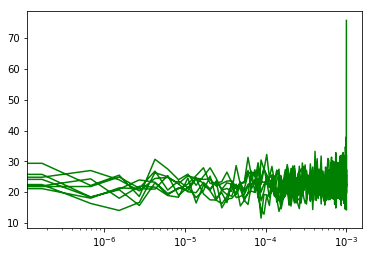

In [36]:
plt.semilogx(lr, avg_loss, 'g-')

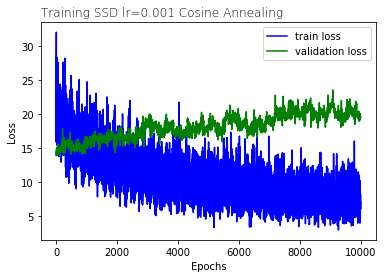

In [4]:
plt.plot(epoch, avg_loss, 'b-', label="train loss")
plt.plot(epoch_val, val_loss,'g-',label="validation loss" )

plt.legend()

# Add titles
plt.title("Training SSD lr=0.001 Cosine Annealing", loc='left', fontsize=12, fontweight=0,)
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.savefig("loss_ssd_10000_epochs.pdf", dpi=150)

Text(0,0.5,'Loss')

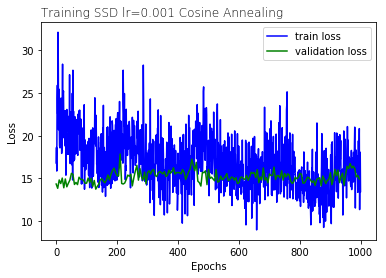

In [7]:
plt.plot(epoch[:1000], avg_loss[:1000], 'b-', label="train loss")
plt.plot(epoch_val[:200], val_loss[:200],'g-',label="validation loss" )

plt.legend()

# Add titles
plt.title("Training SSD lr=0.001 Cosine Annealing", loc='left', fontsize=12, fontweight=0,)
plt.xlabel("Epochs")
plt.ylabel("Loss")